In [1]:
import numpy as np # linear algebra
import pandas as pd 

import os
for dirname, _, filenames in os.walk('input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D


import os
import cv2
from sklearn import preprocessing
from pathlib import Path

In [3]:
labels_train = []
labels_test = []


path_train = []
path_test = []

In [4]:
train_path = "train"
test_path = "test"

In [5]:
for filename in os.listdir(train_path):
    if(filename.split('.')[1]=="jpg"):
        labels_train.append(filename.split('_')[0])
        path_train.append(os.path.join(train_path, filename)) 

for filename in os.listdir(test_path):
    if(filename.split('.')[1]=="jpg"):
        labels_test.append(filename.split('_')[0])
        path_test.append(os.path.join(test_path, filename))  

In [6]:
labels_test

['apple',
 'apple',
 'apple',
 'apple',
 'apple',
 'apple',
 'apple',
 'apple',
 'apple',
 'apple',
 'apple',
 'apple',
 'apple',
 'apple',
 'apple',
 'apple',
 'apple',
 'apple',
 'apple',
 'banana',
 'banana',
 'banana',
 'banana',
 'banana',
 'banana',
 'banana',
 'banana',
 'banana',
 'banana',
 'banana',
 'banana',
 'banana',
 'banana',
 'banana',
 'banana',
 'banana',
 'banana',
 'mixed',
 'mixed',
 'mixed',
 'mixed',
 'mixed',
 'orange',
 'orange',
 'orange',
 'orange',
 'orange',
 'orange',
 'orange',
 'orange',
 'orange',
 'orange',
 'orange',
 'orange',
 'orange',
 'orange',
 'orange',
 'orange',
 'orange',
 'orange']

In [7]:
label_train_unique = np.unique(np.array(labels_train))
label_test_unique = np.unique(np.array(labels_test))

In [8]:
print("Unique labels for train are: ", label_train_unique)
print("Number of jpg images in train are: ", len(path_train))

print("\nUnique labels are for test are: ", label_test_unique)
print("Number of jpg images for test are: ", len(path_test))

Unique labels for train are:  ['apple' 'banana' 'mixed' 'orange']
Number of jpg images in train are:  240

Unique labels are for test are:  ['apple' 'banana' 'mixed' 'orange']
Number of jpg images for test are:  60


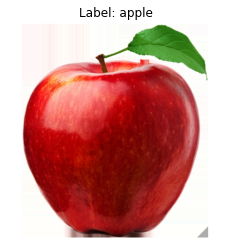

In [9]:
image = cv2.imread(path_train[0])
rgb_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
plt.imshow(rgb_img)
plt.title("Label: " + labels_train[0])
plt.axis('off')
plt.show()

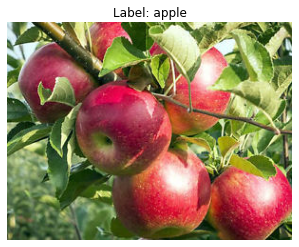

In [10]:
image = cv2.imread(path_test[0])

rgb_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 

plt.imshow(rgb_img)
plt.title("Label: " + labels_test[0])
plt.axis('off')
plt.show()

In [11]:
X_train = []

for path in path_train:
    img = cv2.imread(path)    
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    final_img =  cv2.resize(rgb_img, (50,50))
    X_train.append(final_img)
    
X_train = np.array(X_train)    

In [12]:
X_train.shape

(240, 50, 50, 3)

In [13]:
X_test = []

for path in path_test:
    img = cv2.imread(path)
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    final_img = cv2.resize(rgb_img, (50,50))
    X_test.append(final_img)
    
X_test = np.array(X_test)    

In [14]:
fruits = {}

for i in range(len(label_train_unique)):
    fruits[label_train_unique[i]] = i
    
fruits   

{'apple': 0, 'banana': 1, 'mixed': 2, 'orange': 3}

In [15]:

temp_train = []
temp_test = []


for label in labels_train:
    temp_train.append(fruits.get(label))

for label in labels_test:
    temp_test.append(fruits.get(label))

print("Length of train data: ", len(temp_train))
print("Length of test data: ", len(temp_test))

Length of train data:  240
Length of test data:  60


In [16]:
import tensorflow

In [17]:
y_train = tensorflow.keras.utils.to_categorical(temp_train, 4)
y_test = tensorflow.keras.utils.to_categorical(temp_test, 4)

Length of X_train:  240


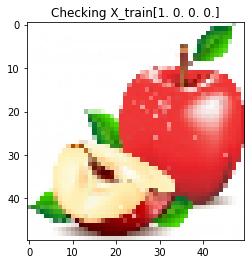

In [18]:
print("Length of X_train: ", len(X_train))
plt.imshow(X_train[34])
plt.title("Checking X_train"+str(y_train[58]))
plt.show()

In [19]:
X_train = X_train.astype(float)
X_test = X_test.astype(float)

In [20]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [21]:
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)

print("\ny_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (240, 50, 50, 3)
X_test shape:  (60, 50, 50, 3)

y_train shape:  (240, 4)
y_test shape:  (60, 4)


In [22]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = (50, 50, 3), padding = 'same', activation = 'relu'))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding = 'same', activation="relu"))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.3))


model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation = 'softmax'))

In [23]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.001)

model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 50, 50, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)        0

In [25]:
history = model.fit(X_train, y_train, batch_size = 32, epochs = 150, validation_split = 0.2, shuffle = True)

Epoch 1/150
6/6 [==============================] - 1s 175ms/step - loss: 1.3323 - accuracy: 0.4427 - val_loss: 1.5929 - val_accuracy: 0.0000e+00
Epoch 2/150
6/6 [==============================] - 1s 133ms/step - loss: 1.1251 - accuracy: 0.5938 - val_loss: 1.8489 - val_accuracy: 0.0000e+00
Epoch 3/150
6/6 [==============================] - 1s 139ms/step - loss: 0.7632 - accuracy: 0.7240 - val_loss: 0.9822 - val_accuracy: 0.2500
Epoch 4/150
6/6 [==============================] - 1s 137ms/step - loss: 0.5355 - accuracy: 0.8073 - val_loss: 2.5469 - val_accuracy: 0.0625
Epoch 5/150
6/6 [==============================] - 1s 137ms/step - loss: 0.5504 - accuracy: 0.8073 - val_loss: 0.5855 - val_accuracy: 0.7708
Epoch 6/150
6/6 [==============================] - 1s 135ms/step - loss: 0.3941 - accuracy: 0.8750 - val_loss: 1.6042 - val_accuracy: 0.2708
Epoch 7/150
6/6 [==============================] - 1s 132ms/step - loss: 0.3365 - accuracy: 0.8698 - val_loss: 0.5980 - val_accuracy: 0.7917
Epoch

Epoch 59/150
6/6 [==============================] - 1s 132ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 1.4140 - val_accuracy: 0.7500
Epoch 60/150
6/6 [==============================] - 1s 131ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 1.2574 - val_accuracy: 0.7292
Epoch 61/150
6/6 [==============================] - 1s 134ms/step - loss: 0.0089 - accuracy: 0.9948 - val_loss: 1.4527 - val_accuracy: 0.7292
Epoch 62/150
6/6 [==============================] - 1s 135ms/step - loss: 0.0109 - accuracy: 0.9948 - val_loss: 1.1806 - val_accuracy: 0.7708
Epoch 63/150
6/6 [==============================] - 1s 133ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 4.0433 - val_accuracy: 0.5208
Epoch 64/150
6/6 [==============================] - 1s 136ms/step - loss: 0.0097 - accuracy: 1.0000 - val_loss: 1.6277 - val_accuracy: 0.7292
Epoch 65/150
6/6 [==============================] - 1s 143ms/step - loss: 9.4624e-04 - accuracy: 1.0000 - val_loss: 2.1560 - val_accuracy: 0.6458
Ep

Epoch 116/150
6/6 [==============================] - 1s 133ms/step - loss: 0.0119 - accuracy: 0.9948 - val_loss: 2.0626 - val_accuracy: 0.6042
Epoch 117/150
6/6 [==============================] - 1s 135ms/step - loss: 0.0152 - accuracy: 0.9948 - val_loss: 0.7604 - val_accuracy: 0.8333
Epoch 118/150
6/6 [==============================] - 1s 132ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.3304 - val_accuracy: 0.9167
Epoch 119/150
6/6 [==============================] - 1s 132ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.5032 - val_accuracy: 0.8542
Epoch 120/150
6/6 [==============================] - 1s 133ms/step - loss: 0.0115 - accuracy: 0.9948 - val_loss: 0.8197 - val_accuracy: 0.8333
Epoch 121/150
6/6 [==============================] - 1s 132ms/step - loss: 0.0077 - accuracy: 0.9948 - val_loss: 1.0805 - val_accuracy: 0.7917
Epoch 122/150
6/6 [==============================] - 1s 134ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 1.0035 - val_accuracy: 0.7917

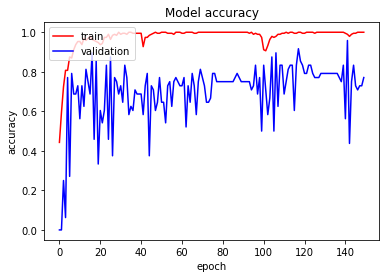

In [26]:
plt.plot(history.history['accuracy'], label='train', color="red")
plt.plot(history.history['val_accuracy'], label='validation', color="blue")
plt.title('Model accuracy')
plt.legend(loc='upper left')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

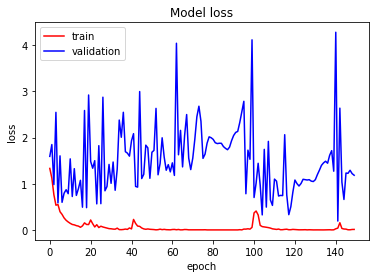

In [27]:
plt.plot(history.history['loss'], label='train', color="red")
plt.plot(history.history['val_loss'], label='validation', color="blue")
plt.title('Model loss')
plt.legend(loc='upper left')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [28]:
score, accuracy = model.evaluate(X_test, y_test)
print('Test score achieved:', score)
print('Test accuracy achieved:', accuracy)

2/2 [==============================] - 0s 18ms/step - loss: 1.0980 - accuracy: 0.8333
Test score achieved: 1.098035216331482
Test accuracy achieved: 0.8333333134651184


In [29]:
pred = model.predict(X_test)

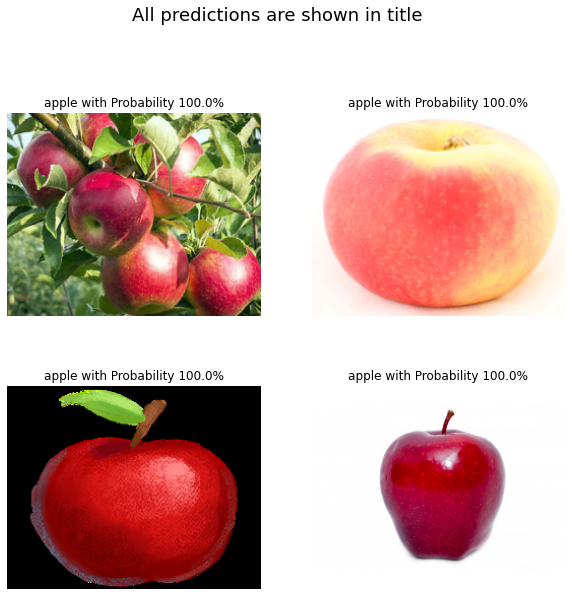

In [30]:
fig, axs= plt.subplots(2,2, figsize=[10,10])
fig.subplots_adjust(hspace=.01)


count=0
for i in range(2):    
    for j in range(2):  
        
        img = cv2.imread(path_test[count])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
        img = cv2.resize(img, (250,200))
        result = np.argsort(pred[count])[::-1]
        
        i_max = -1
        max_val = ""
        for (k,val) in enumerate(fruits.keys()):
            
            if(pred[count][k] > i_max):
                i_max = pred[count][k]
                max_val = val
        
        txt = str(max_val) + " with Probability "+ str("{:.4}%".format(i_max*100)) 
            
        
        axs[i][j].imshow(img)
        axs[i][j].set_title(txt)
        axs[i][j].axis('off')

        count+=1
        
plt.suptitle("All predictions are shown in title", fontsize = 18)        
plt.show()